In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import solve_ivp
from scipy import interpolate 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import datetime
import seaborn as sns
from myfunctions_multi_scale import *
%matplotlib inline

In [2]:
# Import of I data
# irradiance data is based on meteorological data from: https://ims.data.gov.il/he/ims/6 
dFI = pd.read_csv('../data/ims_data_2014_umol_photons.csv',encoding= 'unicode_escape',header=None)
days = list(range(1,366))

In [3]:
I_plot = np.zeros(24*365)
light_hours = list(range(5,19))
for day in days:
    for hour in light_hours:
        I_plot[(day - 1)*24 + hour] = float(dFI.iloc[day][hour-1])

annual_hours = list(range(1,(366-1)*24+1))
f0 = interpolate.interp1d(annual_hours, I_plot,kind = 'linear')

January 16
February 17
March 19
April 24
May 25
June 26
July 28
August 29
September 29.5
October 25
November 21
December 18


[Text(0, 0, '1 Jan'),
 Text(0, 0, '1 February'),
 Text(0, 0, '1 March'),
 Text(0, 0, '1 April'),
 Text(0, 0, '1 May'),
 Text(0, 0, '1 June'),
 Text(0, 0, '1 July'),
 Text(0, 0, '1 August'),
 Text(0, 0, '1 September'),
 Text(0, 0, '1 October'),
 Text(0, 0, '1 November'),
 Text(0, 0, '1 December')]

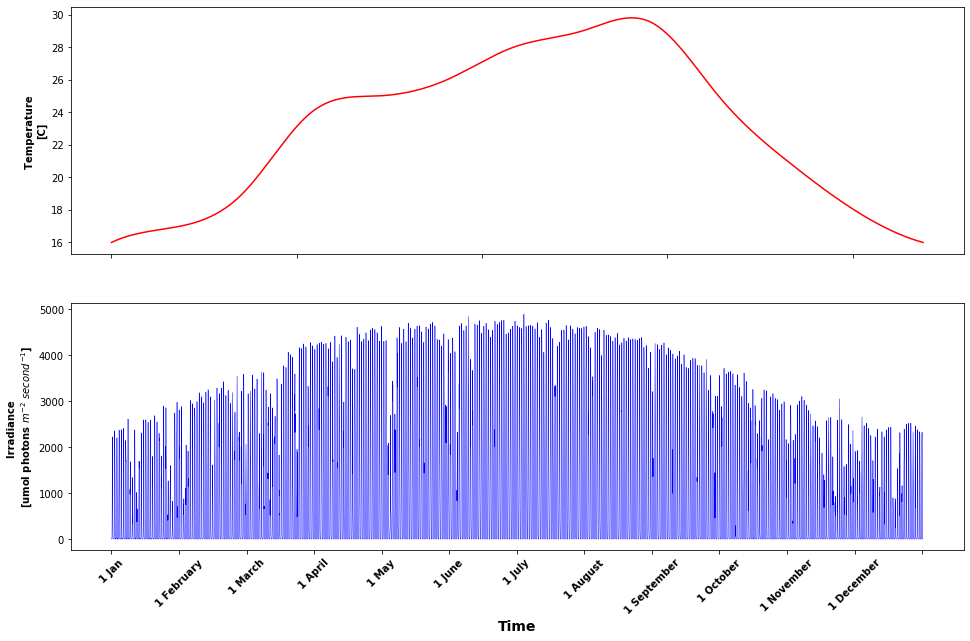

In [4]:
# T and light data

x1 = pd.ExcelFile('../data/input.xlsx')

dfT = x1.parse('T_multi-scale',header=None)
# Temperatures are water temperatures, taken from:
# Y. Suari, et al., Sandbar Breaches Control of the Biogeochemistry of a Micro-Estuary RIME-restoration of
# Israeli micro estuaries. Front. Mar. Sci. (2019) 

days_reduced,hours_reduced = [],[]
for i in range(1,13):
    day = datetime.datetime(2014, i, 1)
    days_reduced.append(int(day.strftime("%j")))

days_reduced.append(366)
for j in range(1,13):
    day = datetime.datetime(2014, j, 1)
    hours_reduced.append((int(day.strftime("%j"))-1)*24)
hours_reduced.append((366-1)*24)
T = []

# assigmment of parameters to values: 
for key,val in zip(dfT.iloc[1:][0],dfT.iloc[1:][1]):
    exec(key + '=val')
    T.append(val)
    print(key,val)
T.append(T[0])
days = list(range(1,366))

f1 = interpolate.interp1d(hours_reduced, T,kind = 'cubic')
T_interp = f1(annual_hours)

fig, ax = plt.subplots(2,1,figsize=(16,10))
xlabels = ['1 Jan', '1 February', '1 March', '1 April', '1 May', '1 June', '1 July', '1 August', '1 September', '1 October','1 November', '1 December']

ax[0].plot(annual_hours,T_interp, 'r-')
ax[1].plot(annual_hours,I_plot, 'b-', linewidth=0.5)

ax[1].set_xlabel('Time',fontsize=14, weight="bold")
ax[0].set_ylabel('Temperature \n[C]',fontsize=10, weight="bold")
ax[1].set_ylabel('Irradiance \n[umol photons $m^{-2}$ $second^{-1}$]',fontsize=10, weight="bold")
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].set_xticks(annual_hours[0:len(annual_hours):int(len(annual_hours)/12-1)])
ax[1].set_xticklabels([str(i) for i in xlabels], rotation=45,fontsize=10, weight="bold")

In [5]:
# assign light data into an array for simulations

I = np.zeros(24*365)
light_hours = list(range(5,19))
for day in days:
    for hour in light_hours:
        I[(day - 1)*24 + hour] = 0.43 * float(dFI.iloc[day][hour-1])

annual_hours = list(range(1,(366-1)*24+1))
f0 = interpolate.interp1d(annual_hours, I,kind = 'linear')

In [6]:
x1 = pd.ExcelFile('../data/input.xlsx')
df1 = x1.parse('Parameters_multi-scale',header=None)

# assigmment of parameters to values: 
for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

n_reactors = np.int(n_reactors)

umol_to_percent_DW 0.0014
n_days 14.0
Next0 500.0
Nint0 1.85
m0 0.15
S 30.0
Nintcrit 2.002
n_reactors 541.0
Qp 459.5833333333333
Qsea 7775.568181818181
Nsea 500.0
dilution 0.0
miu 0.027
Nintmax 4.2
Nintmin 0.7
KN 1.2
Ks 14.0
Vmax 60.0
Z 1.0
KI 20.0
K0 1.5
Ka 0.15
Topt 18.0
Tmin 5.0
Tmax 31.5
n 2.0
losses20 0.0016
teta 1.047
Sopt 18.0
Smin 0.0
Smax 45.0
Shigh 30.0
Slow 12.0


Starting point
[1, 7, 33, 45]
Done


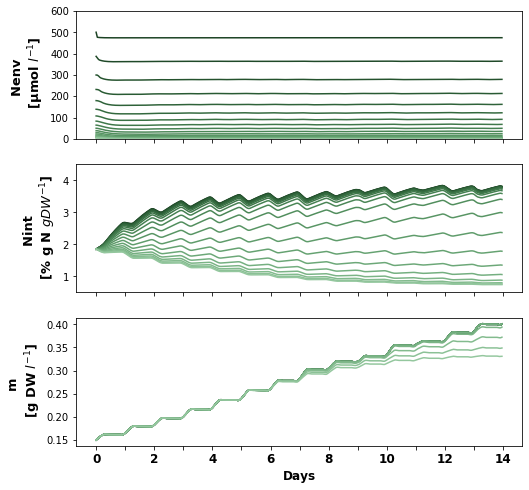

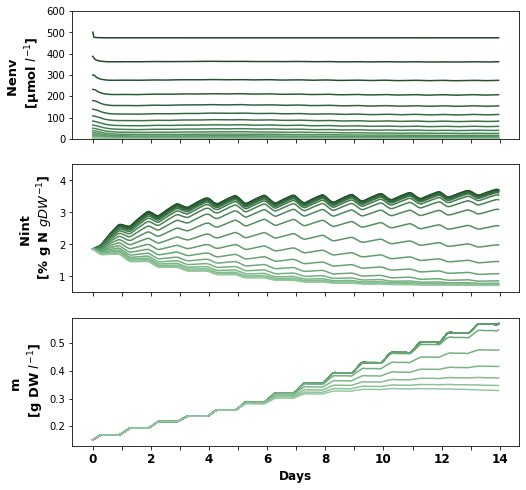

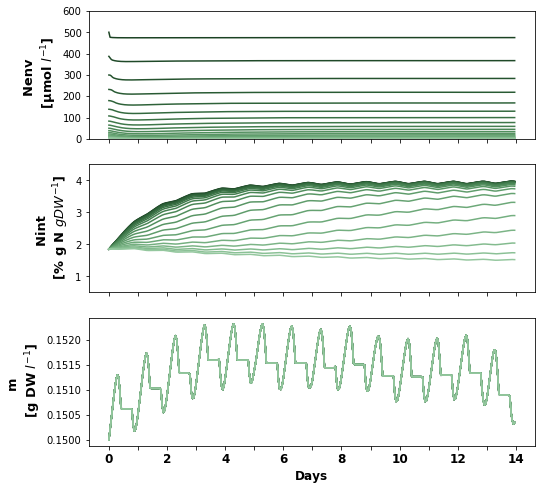

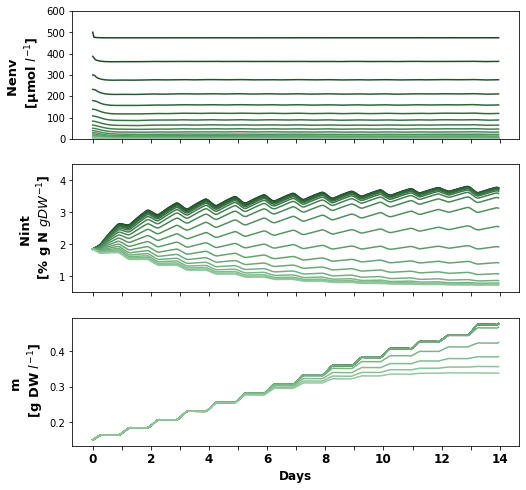

In [7]:
# Plot: 4 seasons - one cultivation period (14 days) per season + 5% dilution of Nsea from reactor to reactor

n_reactors = 100
NSEA, NEXT, NINT, M, Total_N, T = [],[],[],[],[],[]
Total_biomass = []

print('Starting point')


# setup initial conditions identical for all reactors
x0 = n_reactors*[Nsea, Next0, Nint0, m0]

for i in list(range(4,len(x0),4)): x0[i] = x0[i-4] * 0.95
for i in list(range(5,len(x0),4)): x0[i] = x0[i-4] * 0.95       
   
resolution = 5
dilution = 0.05
weeks = [1, 7, 33, 45]
seasons = ['Winter', 'Spring', 'Summer','Autumn']
print(weeks)

for week0 in weeks:
    t0 = 10 + 7 * 24 * (week0-1)
    t = list(range(t0,t0 + int(n_days*24)))
    times = list(range(t0,t0 + int(n_days*24)))

    args = (Nintcrit,Nintmax,Nintmin,Vmax,Ks,KN,miu,S,Z,KI,K0,Ka,Topt,Tmin,Tmax,losses20,
            teta,Sopt,Smin,Smax, Qp, Qsea, Nsea,f1,f0,dilution,n,umol_to_percent_DW)

    # solve the ODEs using the new syntax
    sol = solve_ivp(multi_N_f_un, [t[0], t[-1]], x0, args=args, t_eval = t)

    # take the solution of the state variables:
    M_farm = []
    N_farm = []
    for i in range(n_reactors):
        NSEA.append(sol.y[i*4,:])
        NEXT.append(sol.y[i*4+1,:])
        NINT.append(sol.y[i*4+2,:])
        M.append(sol.y[i*4+3,:])
        M_farm.append((M[-1][-1] - m0) * 1.785)
        N_farm.append((M[-1][-1] * NINT[-1][-1] - m0 * Nint0) * 1.785 / 100)
    Total_biomass.append(round(sum(M_farm),1))
    Total_N.append(round(sum(N_farm),2))
    
    T.append(sol.t)
    season = seasons[weeks.index(week0)]
    plot_result_un(T,NSEA,NEXT,NINT,M,resolution,n_reactors,Nsea,fig,ax,season) # Add color bar
    
    NSEA, NEXT, NINT, M, N_farm, Total_N, T = [],[],[],[],[],[],[]
    
    x0 = n_reactors*[Nsea, Next0, Nint0, m0]
    for i in list(range(4,len(x0),4)): x0[i] = x0[i-4] * 0.95
    for i in list(range(5,len(x0),4)): x0[i] = x0[i-4] * 0.95  

print("Done")

Starting point
[7]
Done


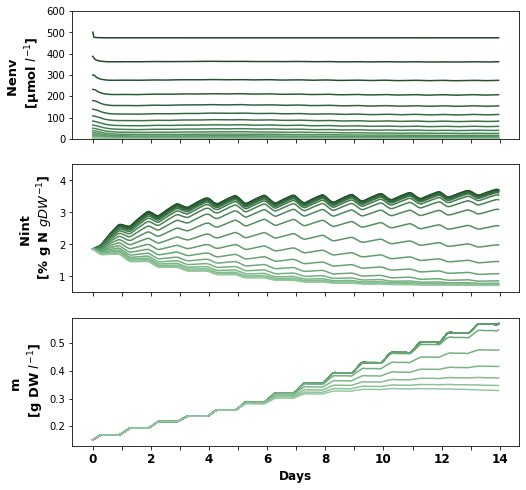

In [14]:
# Spring plot - one cultivation period (14 days) per season + 5% dilution of Nsea from reactor to reactor

n_reactors = 100
NSEA, NEXT, NINT, M, Total_N, T = [],[],[],[],[],[]
Total_biomass = []

print('Starting point')


# setup initial conditions identical for all reactors
x0 = n_reactors*[Nsea, Next0, Nint0, m0]

for i in list(range(4,len(x0),4)): x0[i] = x0[i-4] * 0.95
for i in list(range(5,len(x0),4)): x0[i] = x0[i-4] * 0.95       
   
resolution = 5
dilution = 0.05
weeks = [7]
seasons = ['Spring']
print(weeks)

for week0 in weeks:
    t0 = 10 + 7 * 24 * (week0-1)
    t = list(range(t0,t0 + int(n_days*24)))
    times = list(range(t0,t0 + int(n_days*24)))

    args = (Nintcrit,Nintmax,Nintmin,Vmax,Ks,KN,miu,S,Z,KI,K0,Ka,Topt,Tmin,Tmax,losses20,
            teta,Sopt,Smin,Smax, Qp, Qsea, Nsea,f1,f0,dilution,n,umol_to_percent_DW)

    # solve the ODEs using the new syntax
    sol = solve_ivp(multi_N_f_un, [t[0], t[-1]], x0, args=args, t_eval = t)

    # take the solution of the state variables:
    M_farm = []
    N_farm = []
    for i in range(n_reactors):
        NSEA.append(sol.y[i*4,:])
        NEXT.append(sol.y[i*4+1,:])
        NINT.append(sol.y[i*4+2,:])
        M.append(sol.y[i*4+3,:])
        M_farm.append((M[-1][-1] - m0) * 1.785)
        N_farm.append((M[-1][-1] * NINT[-1][-1] - m0 * Nint0) * 1.785 / 100)
    Total_biomass.append(round(sum(M_farm),1))
    Total_N.append(round(sum(N_farm),2))
    
    T.append(sol.t)
    season = seasons[weeks.index(week0)]
    plot_result_un(T,NSEA,NEXT,NINT,M,resolution,n_reactors,Nsea,fig,ax,season) # Add color bar
    
    NSEA, NEXT, NINT, M, N_farm, Total_N, T = [],[],[],[],[],[],[]
    
    x0 = n_reactors*[Nsea, Next0, Nint0, m0]
    for i in list(range(4,len(x0),4)): x0[i] = x0[i-4] * 0.95
    for i in list(range(5,len(x0),4)): x0[i] = x0[i-4] * 0.95
        
#name = 'fig6b.jpg'
#fig.savefig(fname=name, dpi=600)
print("Done")
